###### This is my first ever Kaggle Competition where I have to predict whether a certain person onboard the titanic will survive or not

### Training Data


Let's take a look at our training data

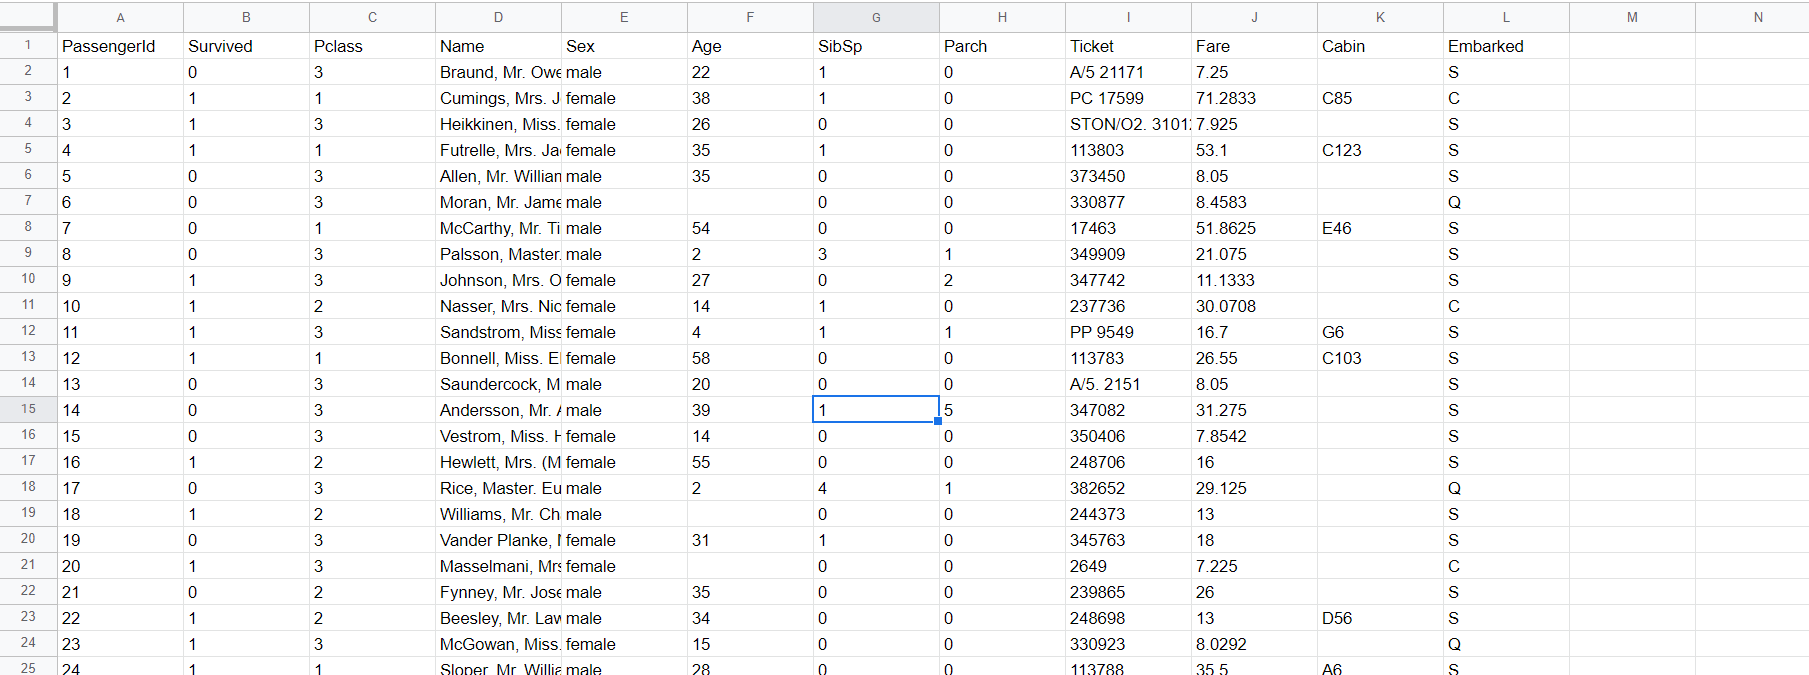


This is the training data, and it contains all of the different columns like PassengerID, Survived, Pclass, Name, Sex, Age. This specfic dataset has information for 891 passengers onboard the titanic. In the Survived Column 1 corresponds to surviving and 0 corresponds to not surviving. 

PClass:

This class shows the people's socio-economic status

1st - First Class
2st - Middle Class 
3rd - Lower Class

SipSb:

This is a class with the number of family members that are onboard the titanic each person has

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)


parch:
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


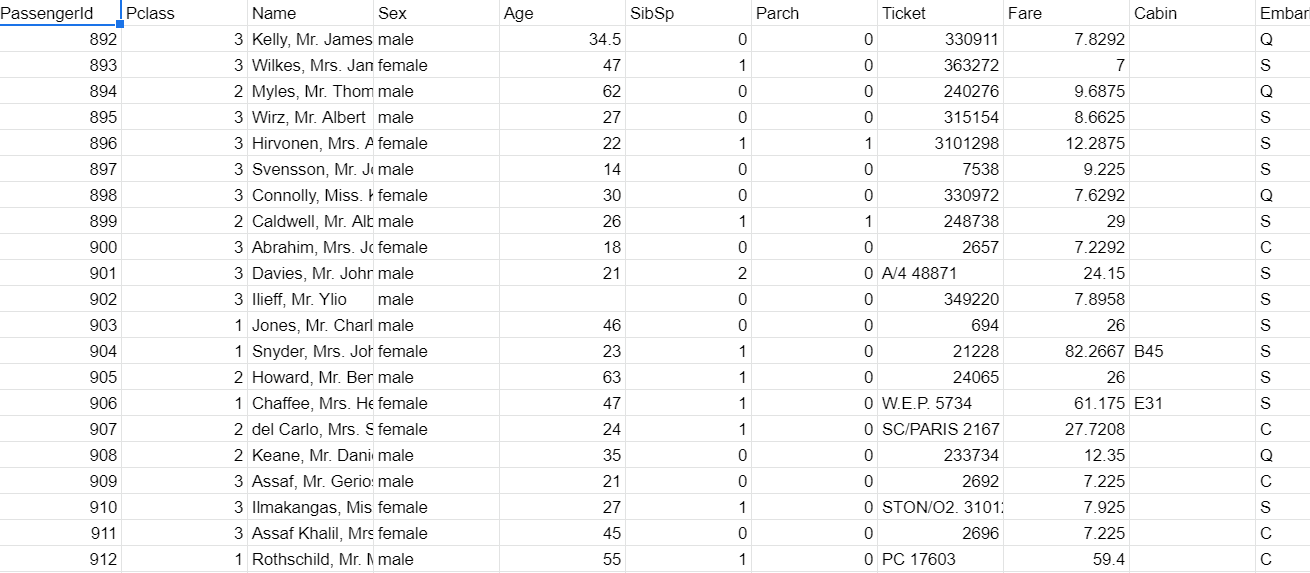

This is the testing data that we have to work with. 

So, lets now get into the code for this simple project.

In [2]:
# Importing Dependencies
import pandas as pd
import numpy as np


In [5]:
train_data = pd.read_csv("C:\\Users\\me\\Documents\\titanic\\data\\train.csv", index_col=0)
test_data = pd.read_csv("C:\\Users\\me\\Documents\\titanic\\data\\test.csv", index_col=0)

In [6]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
pd.isnull(train_data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [12]:
# Lets replace the NaN values with a Zero in the Cabin Column, the reason why I am doing this is because this column does not have an integer, so instead I just turned all of the NaN values into 0's
train_data = train_data.replace(np.NaN, 0)
# Lets check if the changes are made
train_data.head()
pd.isnull(train_data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [13]:
pd.isnull(test_data)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,False,False,False,False,False,False,False,False,True,False
893,False,False,False,False,False,False,False,False,True,False
894,False,False,False,False,False,False,False,False,True,False
895,False,False,False,False,False,False,False,False,True,False
896,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,True,False,False,False,False,True,False
1306,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,True,False


In [14]:
# Lets change all of the NaN values to 0
test_data = test_data.replace(np.NaN, 0)
# Lets check if the changes are made
test_data.head()
pd.isnull(test_data)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,False,False,False,False,False,False,False,False,False,False
893,False,False,False,False,False,False,False,False,False,False
894,False,False,False,False,False,False,False,False,False,False
895,False,False,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False


In [15]:
# Saving all of my changes for my final submissions
train_data.to_csv("C:\\Users\\me\\Documents\\titanic\\final submissions\\train_data.csv", index=False)
test_data.to_csv("C:\\Users\\me\\Documents\\titanic\\final submissions\\test_data.csv", index=False)

In [16]:
# We will have X that contains all of our predictor variables
predictor_variables = ["Pclass", "Sex", "Age", "SibSp", "Parch"]

# We need to get the dummy versions of this data to fit into the algorithm
X = pd.get_dummies(train_data[predictor_variables])
test_x = pd.get_dummies(test_data[predictor_variables])

# Creating the variable that contains that predition that our model has to make
y = train_data["Survived"]

test_y = test_data

In [20]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X,y)

logistic_pred = logistic_regression.predict(test_x)

prediction_survival = pd.DataFrame({"Passenger": test_data.Name, "Survive": logistic_pred})

prediction_survival.to_csv("C:\\Users\\me\\Documents\\titanic\\final submissions\\logistic_pred.csv", index=False)
#print("Accuracy Score:",  accuracy_score(y, logistic_pred))


C:\Users\me\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.ensemble import RandomForestClassifier
# Creating the model
random_model = RandomForestClassifier(random_state=1, max_depth=40)
# Training the Model
random_model.fit(X,y)

# Making a predictions
random_prediction = random_model.predict(test_x)

    # Creating a dataframe that contains all of the predictions along with the name 
prediction_survival = pd.DataFrame({"Passenger": test_data.Name, "Survive": random_prediction})

prediction_survival.to_csv("C:\\Users\\me\\Documents\\titanic\\final submissions\\random_pred.csv", index=False)   



C:\Users\me\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
# We are going to be using the Support Vector Classifier which is able to do classification on discrete data which is that data that we have here
from sklearn import svm
from sklearn.svm import SVC
# Creating the model
svm_model = svm.SVC(random_state=0)
# Fitting the model
svm_model.fit(X,y)
# Making a prediction
svm_prediction = svm_model.predict(test_x)

prediction_survival = pd.DataFrame({"Passenger": test_data.Name, "Survived": svm_prediction})
prediction_survival.to_csv("C:\\Users\\me\\Documents\\titanic\\final submissions\\svm_pred.csv", index=False) # the Index=False to not create a new index when opening it again


C:\Users\me\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
